# コード4-1：時間遅れをもつ微分方程式の数値計算の実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

時間遅れをもつ微分方程式の数値計算の実装の例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み

In [1]:
## 必要があればインストール
# !pip3 install matplotlib numpy scipy statsmodels ddeint

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from ddeint import ddeint
from scipy.integrate import odeint

## 時間遅れをもつ微分方程式

式(4.6)

$$
\frac{d T(t)}{dt} = - \beta T(t) V(t) \\
\frac{d I(t)}{dt} = \beta \int^{t}_{0}{f(a) T(t - a) V(t - a)} da - \delta I(t) \\
\frac{d V(t)}{dt} = p I(t) - c V(t)
$$

$f(a)$は式(4.3)

$$
f(a) = \mu_E(a) e^{- \int^{a}_{0}{\mu_E(s)}ds}
$$

### 固定遅れをもつ常微分方程式

$f(a)$がデルタ関数の場合、固定遅れを$\tau$とすると、

$$
\frac{d T(t)}{dt} = - \beta T(t) V(t) \\
\frac{d I(t)}{dt} = \beta T(t - \tau) V(t - \tau) - \delta I(t) \\
\frac{d V(t)}{dt} = p I(t) - c V(t)
$$

である。

ここでは`ddeint`ライブラリを用いて計算する。  
https://pypi.org/project/ddeint/

In [47]:
## 計算する時刻の設定
Tmin = 0.0
Tmax = 30.0
step_size = 0.01

## beta, delta, p, c, tau, T(0), I(0), V(0)
pars1 = np.array([1.0*np.power(10.0, -10.0), #beta
                  0.5,                        #delta
                  3.0*np.power(10.0, 4.0),    #p
                  2.0,                        #c
                  2.0,                        #tau
                  6.46*np.power(10.0, 6.0),   #T(0)
                  np.power(10.0, -1.0),       #I(0)
                  5.0*np.power(10.0, 4.0)])   #V(0)

In [54]:
def dde_derives(var, t, beta, delta, p, c, tau):
    
    TC, IC, VL = var(t)
    TCd, ICd, VLd = var(t - tau)
    
    dTdt = - beta * TC * VL
    dIdt = beta * TCd * VLd - delta * IC
    dVdt = p * IC - c * VL
    return [dTdt, dIdt, dVdt]


def DDEs(parms):
    beta = parms[0]
    delta = parms[1]
    p = parms[2]
    c = parms[3]
    tau = parms[4]

    ## 計算のタイムステップ
    t_list = np.arange(Tmin, Tmax + step_size, step_size)
    ## t < tauのときのT, I, Vの値 <- 引数tに対してarrayを返す関数
    values_before_tau = lambda t: array([parms[5], parms[6], parms[7]])
    ## 微分方程式の計算
    var_list = ddeint(dde_derives, values_before_tau, t_list, fargs=(beta, delta, p, c, tau, ))

    return np.vstack([t_list, var_list.T])

In [55]:
out1 = DDEs(pars1)

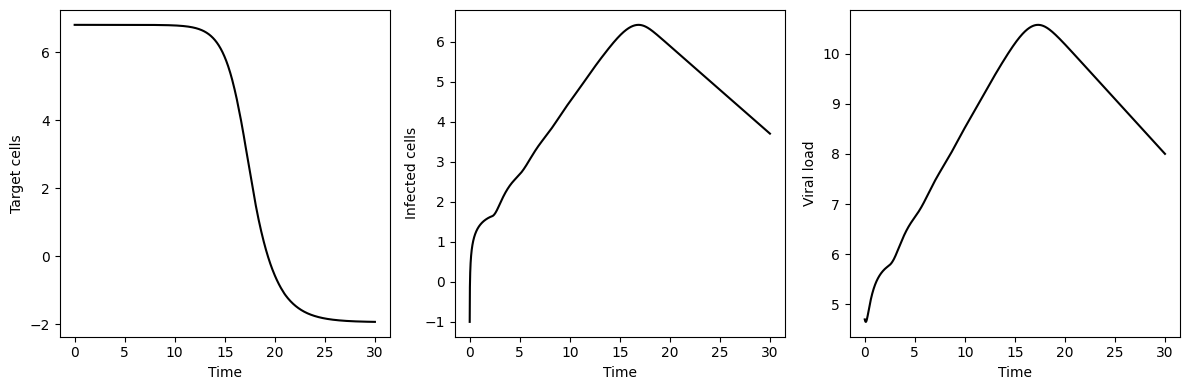

In [65]:
## プロットの準備
fig = plt.figure(figsize=(12,4))

## V(t)のプロット
ax1 = fig.add_subplot(1, 3, 1) ## 1行2列のプロットの１番目
ax1.plot(out1[0], np.log10(out1[1]), color = "black") ## pars1でのT(t)の数値解のプロット
ax1.set_xlabel("Time") ## x軸のラベル
ax1.set_ylabel("Target cells") ## y軸のラベル

## I(t)のプロット
ax2 = fig.add_subplot(1, 3, 2) ## 1行2列のプロットの１番目
ax2.plot(out1[0], np.log10(out1[2]), color = "black") ## pars1でのI(t)の数値解のプロット
ax2.set_xlabel("Time") ## x軸のラベル
ax2.set_ylabel("Infected cells") ## y軸のラベル

## V(t)のプロット
ax3 = fig.add_subplot(1, 3, 3) ## 1行2列のプロットの2番目
ax3.plot(out1[0], np.log10(out1[3]), color = "black") ## pars1でのV(t)の数値解のプロット
ax3.set_xlabel("Time") ## x軸のラベル
ax3.set_ylabel("Viral load") ## y軸のラベル

fig.tight_layout()
fig.show()

### 暗黒期細胞コンパートメントを含む式

$f(a)$が指数関数の場合、式(4.2)

$$
\frac{d T(t)}{dt} = g T(t) \left( 1 - \frac{T(t)}{T_{\text{max}}} \right) - \beta T(t) V(t) \\
\frac{d E(t)}{dt} = \beta T(t) V(t) - k E(t) \\
\frac{d I(t)}{dt} = k E(t) - \delta I(t) \\
\frac{d V(t)}{dt} = p I(t) - c V(t)
$$

において、細胞増殖項$g T(t) \left( 1 - \frac{T(t)}{T_{\text{max}}} \right)$がない場合の式

$$
\frac{d T(t)}{dt} = - \beta T(t) V(t) \\
\frac{d E(t)}{dt} = \beta T(t) V(t) - k E(t) \\
\frac{d I(t)}{dt} = k E(t) - \delta I(t) \\
\frac{d V(t)}{dt} = p I(t) - c V(t)
$$

である。

In [60]:
## 計算する時刻の設定
Tmin = 0.0
Tmax = 30.0
step_size = 0.01

## beta, delta, p, c, k, T(0), I(0), V(0)
pars2 = np.array([1.0*np.power(10.0, -10.0), #beta
                  0.5,                        #delta
                  3.0*np.power(10.0, 4.0),    #p
                  2.0,                        #c
                  1/2.0,                      #k
                  6.46*np.power(10.0, 6.0),   #T(0)
                  np.power(10.0, -1.0),       #E(0)
                  np.power(10.0, -1.0),       #I(0)
                  5.0*np.power(10.0, 4.0)])   #V(0)

In [61]:
def ode_derives(var, t, beta, delta, p, c, k):
    
    TC, EC, IC, VL = var
    
    dTdt = - beta * TC * VL
    dEdt = beta * TC * VL - k * EC
    dIdt = k * EC - delta * IC
    dVdt = p * IC - c * VL
    return [dTdt, dEdt, dIdt, dVdt]


def ODEs(parms):
    beta = parms[0]
    delta = parms[1]
    p = parms[2]
    c = parms[3]
    k = parms[4]

    ## 計算のタイムステップ
    t_list = np.arange(Tmin, Tmax + step_size, step_size)
    ## 初期値 T(0), E(0), I(0), V(0)
    var_init = [parms[5], parms[6], parms[7], parms[8]]
    ## 微分方程式の計算
    var_list = odeint(ode_derives, var_init, t_list, args = (beta, delta, p, c, k))

    return np.vstack([t_list, var_list.T])

In [64]:
out2 = ODEs(pars2)

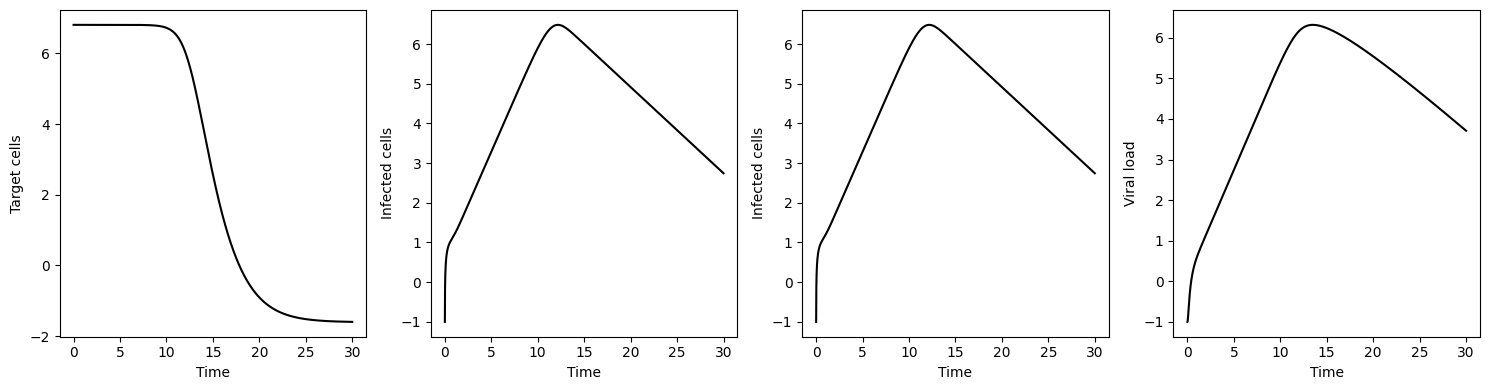

In [67]:
## プロットの準備
fig = plt.figure(figsize=(15,4))

## V(t)のプロット
ax1 = fig.add_subplot(1, 4, 1) ## 1行4列のプロットの１番目
ax1.plot(out2[0], np.log10(out2[1]), color = "black") ## pars2でのT(t)の数値解のプロット
ax1.set_xlabel("Time") ## x軸のラベル
ax1.set_ylabel("Target cells") ## y軸のラベル

## E(t)のプロット
ax2 = fig.add_subplot(1, 4, 2) ## 1行4列のプロットの2番目
ax2.plot(out2[0], np.log10(out2[2]), color = "black") ## pars2でのT(t)の数値解のプロット
ax2.set_xlabel("Time") ## x軸のラベル
ax2.set_ylabel("Infected cells") ## y軸のラベル

## I(t)のプロット
ax3 = fig.add_subplot(1, 4, 3) ## 1行4列のプロットの3番目
ax3.plot(out2[0], np.log10(out2[2]), color = "black") ## pars2でのI(t)の数値解のプロット
ax3.set_xlabel("Time") ## x軸のラベル
ax3.set_ylabel("Infected cells") ## y軸のラベル

## V(t)のプロット
ax4 = fig.add_subplot(1, 4, 4) ## 1行4列のプロットの4番目
ax4.plot(out2[0], np.log10(out2[3]), color = "black") ## pars2でのV(t)の数値解のプロット
ax4.set_xlabel("Time") ## x軸のラベル
ax4.set_ylabel("Viral load") ## y軸のラベル

fig.tight_layout()
fig.show()

### アーロン分布による近似

n_E=3およびτ_E=0.98

式(4.7)

$$
\frac{d T(t)}{dt} = - \beta T(t) V(t) \\
\frac{d E_1(t)}{dt} = \beta T(t) V(t) - \frac{n_E}{\tau_E}E_1(t) \\
\frac{d E_2(t)}{dt} = \frac{n_E}{\tau_E} \left( E_1(t) - E_2(t) \right) \\
\frac{d E_3(t)}{dt} = \frac{n_E}{\tau_E} \left( E_2(t) - E_3(t) \right) \\
\frac{d I(t)}{dt} = \frac{n_E}{\tau_E} E_3(t) - \delta I(t) \\
\frac{d V(t)}{dt} = p I(t) - c V(t)
$$

In [4]:
## 計算

In [5]:
## 比較？